<a href="https://colab.research.google.com/github/traian16/repo16/blob/main/Sentiment_Analysis_for_Facebook_Posts_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import LancasterStemmer, WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import re
import unicodedata
import json
import inflect
import matplotlib.pyplot as plt

import json
# load json file into dataframe, assign to 'data'
with open('your_posts_1.json') as file:
#with open('BP_Optimum_Johor_15092021.json') as file:
  data = json.load(file)


print(type(data))       # a list
print(type(data[0]))    # first object in the list is a dictionary
print(len(data))

<class 'list'>
<class 'dict'>
234


# Store the textual data of my FB posts in a list; extract the descriptions from the posts so that we can analyze the sentiments of the posts

In [ ]:
# create empty list
empty_lst = []
# multiple nested loops to store all post in empty list
for dct in data:
    for k, v in dct.items():
        if k == 'data':
            if len(v) > 0:
                for k_i, v_i in v[0].items():  
                    if k_i == 'post':
                        empty_lst.append(v_i)
print("This is the empty list: ", empty_lst)
print("\nLength of list: ", len(empty_lst))
for i in empty_lst:
  print(i)

# Perform Tokenization on the textual data that was just stored in the List

In [63]:
nltk.download('punkt')
nested_sent_token = [nltk.sent_tokenize(lst) for lst in empty_lst]
# flatten list, len: 3241
flat_sent_token = [item for sublist in nested_sent_token for item in sublist]
print("Flatten sentence token: ", len(flat_sent_token))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Flatten sentence token:  127


# Now we need to Normalize the data by writing some functions

In [64]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode(
            'ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

# To LowerCase
def to_lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

# Remove Punctuation
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Replace Numbers with Textual Representations
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

# Remove Stopwords
def remove_stopwords(words):
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

# Combine all functions into Normalize() function
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words

nltk.download('stopwords')
sents = normalize(flat_sent_token)
print("Lenght of sentences list:", len(sents))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Lenght of sentences list: 124


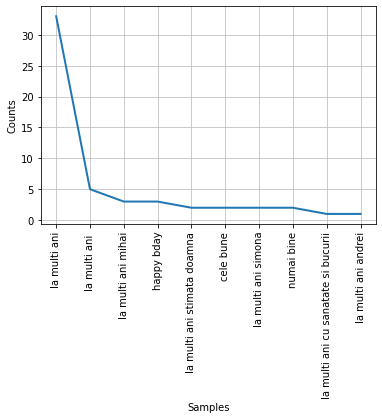

In [65]:
# Vizualize data, check the most frequent sentences to see what I share the most on Facebook posts:
from nltk.probability import FreqDist
# Find frequency of sentence 
fdist_sent = FreqDist(sents)
fdist_sent.most_common(20)
# Plot
fdist_sent.plot(10)


# Facebook Posts - Sentiment Analysis & create a report showing whether the sentiments are neutral, positive or negative


In [ ]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()
sentiment = []
sentiment2 = []
for sent in sents:
  sent1 = sent
  sent_scores = sia.polarity_scores(sent1)
  for x,y in sent_scores.items():
    sentiment2.append((x,y))
  sentiment.append((sent1, sent_scores))
  print(sentiment)



In [ ]:
# Sentiment
cols = ['sentence', 'numbers']
result = pd.DataFrame(sentiment, columns=cols)
print("The first five raws of result", result.head())

# Sentiment 2
cols = ['label', 'values']
result2 = pd.DataFrame(sentiment2, columns=cols)
print("The first five raws of result2", result2.head())
